# **Using TF-IDF by Python**

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.metrics import accuracy_score, classification_report, f1_score,recall_score,accuracy_score,roc_auc_score,precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sb
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Testing for 10 emojis (Don't use this)


In [ ]:
import os
train_fname = f"/content/gdrive/MyDrive/CS3244/Final/Updated/full_train_preprocessed_subset.csv"

train = pd.read_csv(train_fname)
train = train.drop(columns=['Unnamed: 0'])

test_fname = f"/content/gdrive/MyDrive/CS3244/Final/Updated/full_test_preprocessed_subset.csv"
test = pd.read_csv(test_fname)
test = test.drop(columns=['Unnamed: 0'])

val_fname = f"/content/gdrive/MyDrive/CS3244/Final/Updated/full_val_preprocessed_subset.csv"
val = pd.read_csv(val_fname)
val = val.drop(columns=['Unnamed: 0'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **TF-IDF**

In [ ]:
# Combine train and val and perform 0.2 train test split
print(train.shape)
train_val = train.append(val)
train_val.shape

(133999, 14)


(151222, 14)

In [ ]:
train_val[['tokens']] = train_val.loc[:,['tokens']].fillna(value={})
test['tokens'] = test.loc[:,['tokens']].fillna(value={})

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = train_val['tokens'].astype(str)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X_test = vectorizer.transform(test['tokens'].astype(str))

In [ ]:
type(X)

scipy.sparse.csr.csr_matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, train_val['label'], test_size = 0.2, random_state = 1)
y_test = test['label']

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.preprocessing import sequence

In [ ]:
y_train

15170     0
119769    3
58026     0
48715     0
28097     2
         ..
73349     4
109259    1
50057     0
5192      4
128037    3
Name: label, Length: 120977, dtype: int64

In [ ]:
from sklearn.decomposition import TruncatedSVD
transformer = TruncatedSVD(300)
X_train_v2 = transformer.fit_transform(X_train)
X_test_v2 = transformer.transform(X_test)

# Training Neural Network on GLOVE embeddings

In [ ]:
#load csv files
df = pd.read_csv("/content/gdrive/MyDrive/CS3244/Final/Updated/full_train_preprocessed_subset.csv")
df = df.drop(columns=['Unnamed: 0'])

df_val = pd.read_csv("/content/gdrive/MyDrive/CS3244/Final/Updated/full_val_preprocessed_subset.csv")
df_val = df_val.drop(columns=['Unnamed: 0'])

df_test = pd.read_csv("/content/gdrive/MyDrive/CS3244/Final/Updated/full_test_preprocessed_subset.csv")
df_test = df_test.drop(columns=['Unnamed: 0'])

df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,annotations,text,hashtag,tokens,upper_case,num_digits,num_hashtags,num_words,average_word_length,positive,neutral,negative,compound,label
0,1384,Nobody go to Walmart in sulphur,NaN,"['nobody', 'go', 'walmart', 'sulphur']",2,0,1,6,4.333333,0.0,1.0,0.0,0.0,2
1,1384,@emberlhamon @MLidak welcome to the ugly club!!,NaN,"['welcome', 'ugly', 'club']",2,0,1,8,5.125000,0.0,1.0,0.0,0.0,2
2,1384,getting to help coach jr high,NaN,"['getting', 'help', 'coach', 'jr', 'high']",0,0,1,6,4.000000,0.0,1.0,0.0,0.0,2
3,1384,Yo Gotti and Black Youngsta on stage we all th...,NaN,"['yo', 'gotti', 'black', 'youngsta', 'stage', ...",4,0,1,13,3.692308,0.0,1.0,0.0,0.0,2
4,1384,@spenceribarra just making sure I haven't been...,NaN,"['making', 'sure', 'havent', 'replaced']",1,0,1,9,5.333333,0.0,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133994,1392,Agape Worshippers their voices are so angelic...,NaN,"['agape', 'worshipper', 'voice', 'angelic', 'g...",3,0,1,12,5.000000,0.0,1.0,0.0,0.0,3
133995,1392,@abike \nHe's a cutie,NaN,"['he', 'cutie']",1,0,1,5,3.400000,0.0,1.0,0.0,0.0,3
133996,1392,@Americooligan thanks,NaN,['thanks'],1,0,1,3,6.666667,0.0,1.0,0.0,0.0,3
133997,1392,Ari's mom braided my hair,NaN,"['aris', 'mom', 'braided', 'hair']",1,0,1,6,3.500000,0.0,1.0,0.0,0.0,3


In [ ]:
from ast import literal_eval
import re

def clean_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

def join_text(x):
  return clean_text(x)
df["text_clean"] = df["text"].apply(lambda x: join_text(x))
df_val["text_clean"] = df_val["text"].apply(lambda x: join_text(x))
df_test["text_clean"] = df_test["text"].apply(lambda x: join_text(x))

In [ ]:
df["text_clean"]

0                           Nobody go to Walmart in sulphur
1              emberlhamon MLidak welcome to the ugly club 
2                             getting to help coach jr high
3         Yo Gotti and Black Youngsta on stage we all th...
4          spenceribarra just making sure I haven t been...
                                ...                        
133994    Agape Worshippers their voices are so angelic ...
133995                                  abike He s a cutie 
133996                                Americooligan thanks 
133997                           Ari s mom braided my hair 
133998                                       RT shwetavyas 
Name: text_clean, Length: 133999, dtype: object

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = df["text_clean"], df["label"], df_val["text_clean"], df_val["label"], df_test["text_clean"], df_test["label"]

In [ ]:
embed_file = '/content/gdrive/MyDrive/CS3244/Glove Embeddings/glove.twitter.27B.100d.txt'

In [ ]:
!pip install keras
from keras.preprocessing.text import Tokenizer
from keras.utils.data_utils import pad_sequences
from keras.models import Sequential

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train.values)

word_index = tokenizer.word_index

sentence_train = tokenizer.texts_to_sequences(X_train.values)
X_train_padding = pad_sequences(sentence_train, padding='post', maxlen = 22)
sentence_val = tokenizer.texts_to_sequences(X_val.values)
X_val_padding = pad_sequences(sentence_val, padding='post', maxlen = 22)
sentence_test= tokenizer.texts_to_sequences(X_test.values)
X_test_padding = pad_sequences(sentence_test, padding='post', maxlen = 22)
vocab_size = len(word_index) + 1

In [ ]:
glove2vector = {}

with open(embed_file, 'rb') as f:
  for l in f:
    line = l.decode().split()
    word = line[0]
    vect = np.array(line[1:]).astype(np.float)
    glove2vector[word] = vect 

f.close()
print('Total %s word vectors.' % len(glove2vector))

len(glove2vector)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


Total 1193515 word vectors.


1193515

In [ ]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
	embedding_vector = glove2vector.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [ ]:
import tensorflow.keras.layers
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
max_length = 100
embedding_layer = Embedding(vocab_size,
                            output_dim=max_length,
                            weights=[embedding_matrix],
                            input_length=X_train_padding.shape[1],
                            trainable=False)

In [ ]:
from tensorflow.keras.layers import  Embedding, Conv1D, Dense, MaxPool1D, Flatten, Input

In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential([
    embedding_layer,
    Input(shape=(100, 1)),
    Conv1D(112, 1, activation='relu', input_shape=(100, 1)),
    MaxPool1D(),
    Conv1D(48, 1, activation='relu'),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

log_folder = 'logs'
callbacks = [
            EarlyStopping(monitor = "val_accuracy", mode = "max", patience = 5, restore_best_weights = True, verbose = 1),
            TensorBoard(log_dir=log_folder)
            ]
num_epochs = 25
history = model.fit(X_train_padding, y_train, epochs=num_epochs, batch_size=32,shuffle=True, callbacks=callbacks, validation_data=(X_val_padding, y_val), verbose=1)

Epoch 1/25
4188/4188 [==============================] - 25s 6ms/step - loss: 1.3489 - accuracy: 0.4084 - val_loss: 1.3184 - val_accuracy: 0.4280
Epoch 2/25
4188/4188 [==============================] - 24s 6ms/step - loss: 1.2993 - accuracy: 0.4375 - val_loss: 1.3046 - val_accuracy: 0.4374
Epoch 3/25
4188/4188 [==============================] - 31s 7ms/step - loss: 1.2790 - accuracy: 0.4472 - val_loss: 1.3038 - val_accuracy: 0.4380
Epoch 4/25
4188/4188 [==============================] - 27s 6ms/step - loss: 1.2631 - accuracy: 0.4552 - val_loss: 1.3007 - val_accuracy: 0.4388
Epoch 5/25
4188/4188 [==============================] - 27s 7ms/step - loss: 1.2492 - accuracy: 0.4622 - val_loss: 1.3091 - val_accuracy: 0.4385
Epoch 6/25
4188/4188 [==============================] - 26s 6ms/step - loss: 1.2366 - accuracy: 0.4692 - val_loss: 1.3151 - val_accuracy: 0.4409
Epoch 7/25
4188/4188 [==============================] - 25s 6ms/step - loss: 1.2247 - accuracy: 0.4745 - val_loss: 1.3231 - val_ac

In [ ]:
model.evaluate(X_test_padding, y_test)

534/534 [==============================] - 2s 3ms/step - loss: 1.3221 - accuracy: 0.4330


[1.3221267461776733, 0.4330422580242157]

In [ ]:
predictions_glove = model.predict(X_test_padding)
preds_classes_glove = np.argmax(predictions_glove,axis=1)

534/534 [==============================] - 1s 2ms/step


In [ ]:
print(accuracy_score(y_test,preds_classes_glove))
print(classification_report(y_test,preds_classes_glove))

0.4330422551720096
              precision    recall  f1-score   support

           0       0.45      0.67      0.54      3934
           1       0.41      0.34      0.37      3546
           2       0.39      0.27      0.32      2911
           3       0.48      0.50      0.49      3619
           4       0.40      0.31      0.35      3053

    accuracy                           0.43     17063
   macro avg       0.42      0.42      0.41     17063
weighted avg       0.43      0.43      0.42     17063



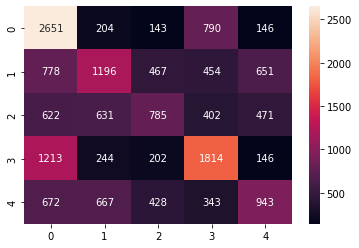

In [ ]:
cf_matrix_glove = confusion_matrix(y_test,preds_classes_glove)  
sb.heatmap(cf_matrix_glove, annot=True, fmt='g')

# Hyperparameter tuning for CNN

In [ ]:
import keras

In [ ]:
import tensorflow.keras.layers
from tensorflow.keras.layers import Dropout, Embedding, LSTM, Dense, Bidirectional
from keras.models import Sequential

from sklearn.metrics import matthews_corrcoef, confusion_matrix
from sklearn import metrics
from sklearn.utils import shuffle

import pickle
import matplotlib.pyplot as plt
import warnings
import logging
logging.basicConfig(level=logging.INFO)


In [ ]:
def model_builder(hp):
  model = Sequential()
  model.add(embedding_layer)

  # Tune the number of units in the first Dense layer
  model.add(layers.Input(shape=(100, )))

  hp_units1 = hp.Int('units1', min_value=16, max_value=128, step=16)
  hp_units2 = hp.Int('units2', min_value=16, max_value=128, step=16)
  hp_units3 = hp.Int('units3', min_value=16, max_value=128, step=16)

  model.add(layers.Conv1D(hp_units1, 1, activation='relu', input_shape=(100, )))
  model.add(layers.MaxPool1D())
  model.add(layers.Conv1D(hp_units2, 1, activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(units=hp_units3, activation='relu'))
  model.add(layers.Dense(5, activation='softmax'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [ ]:
import tensorflow.keras.layers
from tensorflow.keras.layers import Dropout, Embedding, LSTM, Dense, Bidirectional
from keras.models import Sequential

from sklearn.metrics import matthews_corrcoef, confusion_matrix
from sklearn import metrics
from sklearn.utils import shuffle

import pickle
import matplotlib.pyplot as plt
import warnings
import logging
logging.basicConfig(level=logging.INFO)


In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras import layers

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=20,
                     factor=3)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(X_train_padding, y_train, epochs=20, validation_data=(X_val_padding, y_val), callbacks=[stop_early])

In [ ]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model_tune = tuner.hypermodel.build(best_hps)
history = model_tune.fit(X_train_padding, y_train, epochs=10, validation_data=(X_val_padding, y_val), verbose=1)

Epoch 1/10
4188/4188 [==============================] - 25s 6ms/step - loss: 1.4821 - accuracy: 0.3260 - val_loss: 1.3910 - val_accuracy: 0.3815
Epoch 2/10
4188/4188 [==============================] - 21s 5ms/step - loss: 1.3900 - accuracy: 0.3817 - val_loss: 1.3618 - val_accuracy: 0.4052
Epoch 3/10
4188/4188 [==============================] - 18s 4ms/step - loss: 1.3682 - accuracy: 0.3979 - val_loss: 1.3463 - val_accuracy: 0.4174
Epoch 4/10
4188/4188 [==============================] - 19s 4ms/step - loss: 1.3547 - accuracy: 0.4073 - val_loss: 1.3372 - val_accuracy: 0.4220
Epoch 5/10
4188/4188 [==============================] - 21s 5ms/step - loss: 1.3466 - accuracy: 0.4145 - val_loss: 1.3300 - val_accuracy: 0.4264
Epoch 6/10
4188/4188 [==============================] - 18s 4ms/step - loss: 1.3399 - accuracy: 0.4200 - val_loss: 1.3272 - val_accuracy: 0.4288
Epoch 7/10
4188/4188 [==============================] - 18s 4ms/step - loss: 1.3342 - accuracy: 0.4231 - val_loss: 1.3239 - val_ac